In [9]:
import pandas as pd
import numpy as np
feature_names = ['Sex','Length','Diameter','Height','Whole Wt','Shucked Wt','Viscera Wt','Shell Wt','Rings']

In [2]:
abalone = pd.read_csv('abalone.data',names = feature_names)

In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex           4177 non-null object
Length        4177 non-null float64
Diameter      4177 non-null float64
Height        4177 non-null float64
Whole Wt      4177 non-null float64
Shucked Wt    4177 non-null float64
Viscera Wt    4177 non-null float64
Shell Wt      4177 non-null float64
Rings         4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

In [7]:
abalone.replace(('M', 'F','I'), (0,1,2), inplace=True)

In [10]:
corr=abalone.corr()["Sex"]
corr[np.argsort(corr, axis=0)[::-1]]

Sex           1.000000
Rings        -0.351822
Height       -0.417928
Shucked Wt   -0.440927
Shell Wt     -0.445549
Length       -0.448765
Viscera Wt   -0.454658
Diameter     -0.458245
Whole Wt     -0.461238
Name: Sex, dtype: float64

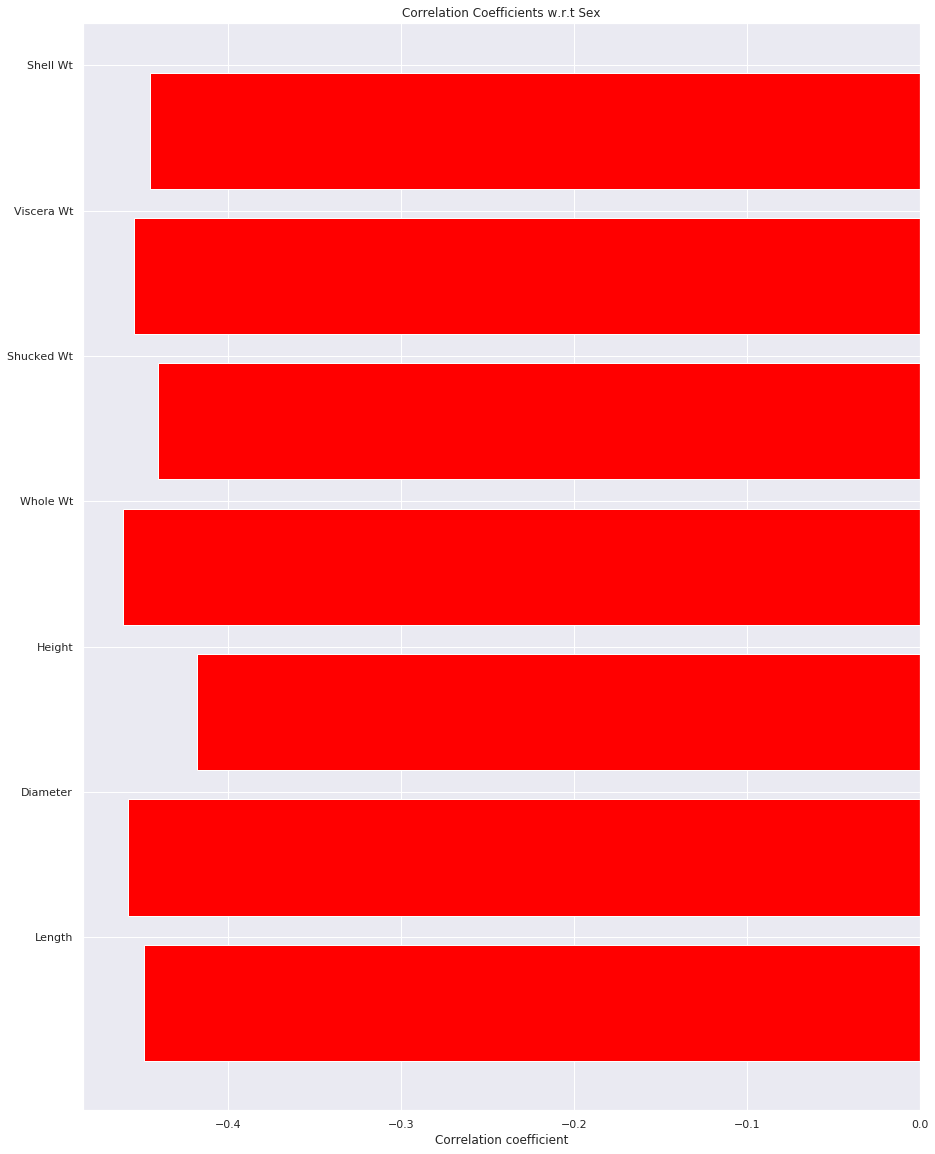

In [18]:
import matplotlib.pyplot as plt
num_feat=abalone.columns[abalone.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(abalone[col].values, abalone.Sex.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,20))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sex");

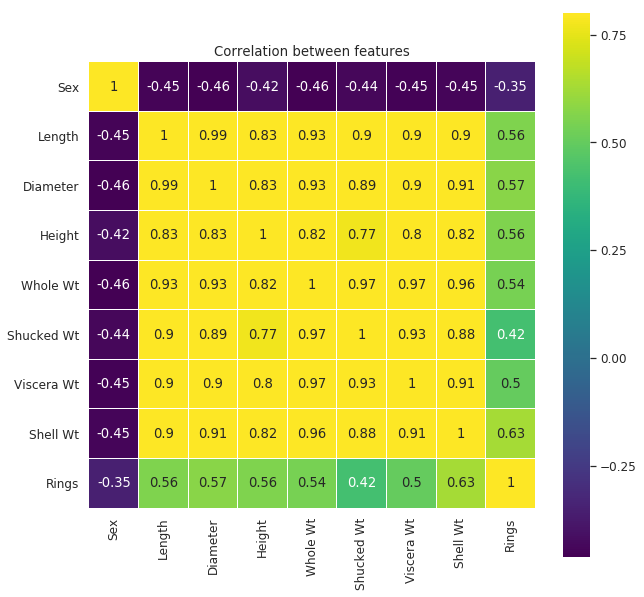

In [20]:
corrMatrix=abalone[['Sex','Length','Diameter','Height','Whole Wt','Shucked Wt','Viscera Wt','Shell Wt','Rings']].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');